# Working With Time Series Data in Pandas

## Converting to DateTime Type

In [1]:
import pandas as pd

pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [2]:
pd.to_datetime('now')

Timestamp('2020-10-26 15:51:07.345632')

In [3]:
pd.to_datetime('Jan:1:1970')

ParserError: Unknown string format: Jan:1:1970

In [4]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In [5]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/c60209f379155744ced4dfc57068e55b/raw/97fc3ab1e2f6fff6ffd409d60029c53954d5784e/coffee_consumption.csv')

In [6]:
df.dtypes

date                   object
coffee_consumption    float64
dtype: object

In [7]:
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [8]:
# convert our date column to datetime type
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## Working with DateTime Series

In [12]:
df.date.dt.month.value_counts()

10    23
7     23
5     23
1     23
12    22
8     22
4     22
11    21
9     21
3     21
6     20
2     20
Name: date, dtype: int64

In [13]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


In [14]:
# cleanup demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']

In [15]:
df

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563
...,...,...
256,2019-12-25,12.250875
257,2019-12-26,7.513206
258,2019-12-27,9.464345
259,2019-12-30,14.623106


## DateTime Indexes

In [16]:
df = df.set_index('date').sort_index()
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


In [17]:
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [18]:
df['2019-05']

,coffee_consumption
date,
2019-05-01,9.970773
2019-05-02,8.755956
2019-05-03,7.790948
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543


In [19]:
df['2019-05-06':'2019-05-16'] # NB. inclusive

,coffee_consumption
date,
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543
2019-05-14,6.220478
2019-05-15,12.743796
2019-05-16,9.169615


### Changing the Period

Vocab: **upsampling** and **downsampling**

- down == samller time window == more data points: e.g. hourly to daily

- up == larger time window == fewer data points: e.g weekly to daily

In [38]:
# daily data
by_day = df.asfreq('D')
by_day

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


### Filling Missing Values

In [33]:
by_day

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


In [26]:
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.301915,14.301915,14.301915
2019-01-02,12.905900,12.905900,12.905900
2019-01-03,10.046015,10.046015,10.046015
2019-01-04,6.354805,6.354805,6.354805
2019-01-05,NaN,6.354805,8.545563
2019-01-06,NaN,6.354805,8.545563
2019-01-07,8.545563,8.545563,8.545563
2019-01-08,9.410101,9.410101,9.410101
2019-01-09,7.219271,7.219271,7.219271


In [39]:
by_day = by_day.fillna(0)

In [40]:
by_day.head(6)

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000
2019-01-06,0.000000


### Resampling
- like groupby for dates

In [41]:
df.resample('3W').mean() # Every 3 weeks

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,9.744190
2019-02-17,10.855301
2019-03-10,9.413472
2019-03-31,11.062768
2019-04-21,10.222518
2019-05-12,10.092044
2019-06-02,11.052819
2019-06-23,9.592148


In [44]:
df.resample('M').sum()

,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
2019-06-30,183.656493
2019-07-31,248.267463
2019-08-31,224.007066
2019-09-30,215.689004


In [46]:
df.resample('W').sum().resample('M').mean()

,coffee_consumption
date,
2019-01-31,47.442870
2019-02-28,52.967916
2019-03-31,51.620292
2019-04-30,50.566915
2019-05-31,52.163714
2019-06-30,48.648939
2019-07-31,52.279082
2019-08-31,53.288159
2019-09-30,50.882459


In [47]:
df.resample('MS').sum()

,coffee_consumption
date,
2019-01-01,233.926749
2019-02-01,206.038853
2019-03-01,219.779000
2019-04-01,222.030626
2019-05-01,248.480093
2019-06-01,183.656493
2019-07-01,248.267463
2019-08-01,224.007066
2019-09-01,215.689004


In [48]:
df.resample('Q').sum()

,coffee_consumption
date,
2019-03-31,659.744602
2019-06-30,654.167213
2019-09-30,687.963534
2019-12-31,690.659860


## Plotting

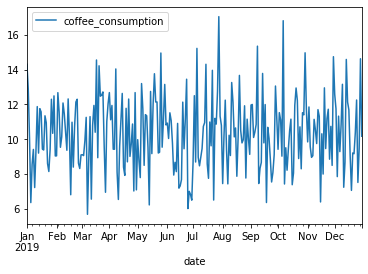

In [49]:
df.plot()

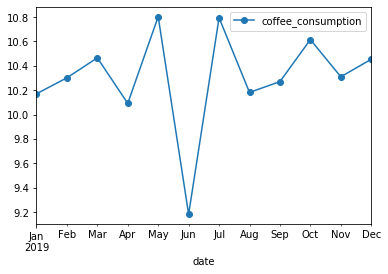

In [51]:
df.resample('M').mean().plot(marker='o')

### Rolling Windows

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-06,10.902159,NaN,NaN,NaN
2019-01-13,9.277212,NaN,NaN,NaN
2019-01-20,10.265097,10.148156,NaN,NaN
2019-01-27,9.690260,9.744190,NaN,NaN
2019-02-03,10.639508,10.198289,10.154847,NaN
2019-02-10,11.195485,10.508418,10.213512,NaN
2019-02-17,10.730911,10.855301,10.504252,10.385805
2019-02-24,9.808429,10.578275,10.412919,10.229557
2019-03-03,9.486304,10.008548,10.372127,10.259428


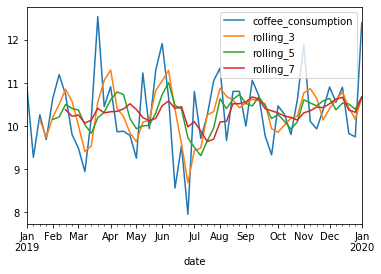

In [52]:
rolling_df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

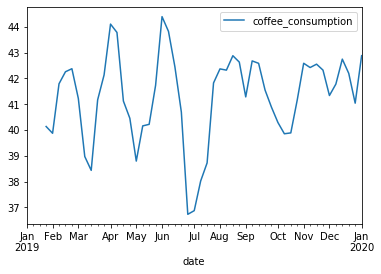

In [54]:
df.resample('W').mean().rolling(4).sum().plot()

### Lagging and Leading
- shift moves data points forward or backwards
- diff takes the difference between future or past data points

In [55]:
df['shift(-1)'] = df.coffee_consumption.shift(-1)
df['shift(1)'] = df.coffee_consumption.shift(1)
df['shift(3)'] = df.coffee_consumption.shift(3)
df['diff(1)'] = df.coffee_consumption.diff(1)
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.301915,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,8.545563,10.046015,14.301915,-3.691210,-7.947110
2019-01-07,8.545563,9.410101,6.354805,12.905900,2.190757,-4.360337
2019-01-08,9.410101,7.219271,8.545563,10.046015,0.864539,-0.635914
2019-01-09,7.219271,9.338456,9.410101,6.354805,-2.190831,0.864465
2019-01-10,9.338456,11.872667,7.219271,8.545563,2.119186,0.792894
2019-01-11,11.872667,9.198816,9.338456,9.410101,2.534210,2.462566


In [56]:
# cleanup the additional columns
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

## Strftime

In [57]:
df.index.strftime('%B %d, %Y')[:4]

Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

## Timedeltas

In [58]:
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date
days_between

Timedelta('130 days 00:00:00')

In [59]:
days_between // pd.Timedelta('1d')

130

In [60]:
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

,coffee_consumption,days_since_max
date,,
2019-12-18,9.058819,13
2019-12-19,7.056316,12
2019-12-20,9.208448,11
2019-12-23,9.162464,8
2019-12-24,10.372400,7
2019-12-25,12.250875,6
2019-12-26,7.513206,5
2019-12-27,9.464345,4
2019-12-30,14.623106,1
